In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.getcwd())

C:\Users\dasar.SELVAMDG\Desktop\p\KNN


In [3]:
data = pd.read_csv('Classified Data',index_col=0)
data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
data.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
data.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [ ]:
# label encoder is not required
#feature scaling is mandatory in KNN
# If we do feature scaling, it is not required to handle outlier treatment

In [8]:
x= data.drop(['TARGET CLASS'], axis=1)
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [9]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = scaler.fit_transform(x)

In [12]:
x

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [13]:
x = pd.DataFrame(x)

In [14]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [15]:
y = data['TARGET CLASS']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [16]:
# Imbalance data check
y.value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

# split the data into train and test for model training and prediction

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 10)
(750,)
(250, 10)
(250,)


# Build KNN Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
y_predict_train = knn_model.predict(x_train)
y_predict = knn_model.predict(x_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
print(classification_report(y_train,y_predict_train))
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       366
           1       0.93      0.97      0.95       384

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       134
           1       0.95      0.91      0.93       116

    accuracy                           0.94       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.94      0.94      0.94       250



In [25]:
print(confusion_matrix(y_train,y_predict_train))
print(confusion_matrix(y_test,y_predict))

[[340  26]
 [ 12 372]]
[[128   6]
 [ 10 106]]


In [26]:
print('Train Accuracy')
print(accuracy_score(y_train,y_predict_train))
print('Test Accuracy')
print(accuracy_score(y_test,y_predict))

Train Accuracy
0.9493333333333334
Test Accuracy
0.936


## Select the best K value by using Error_rate

In [34]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_predicted = knn.predict(x_test)
    error_rate.append(np.mean(y_predicted!=y_test))

In [35]:
error_rate

[0.084,
 0.088,
 0.052,
 0.076,
 0.064,
 0.056,
 0.052,
 0.06,
 0.048,
 0.056,
 0.052,
 0.04,
 0.044,
 0.044,
 0.048,
 0.048,
 0.048,
 0.048,
 0.044,
 0.048,
 0.052,
 0.048,
 0.052,
 0.048,
 0.044,
 0.044,
 0.044,
 0.044,
 0.044,
 0.04,
 0.044,
 0.044,
 0.048,
 0.04,
 0.044,
 0.044,
 0.044,
 0.036,
 0.044]

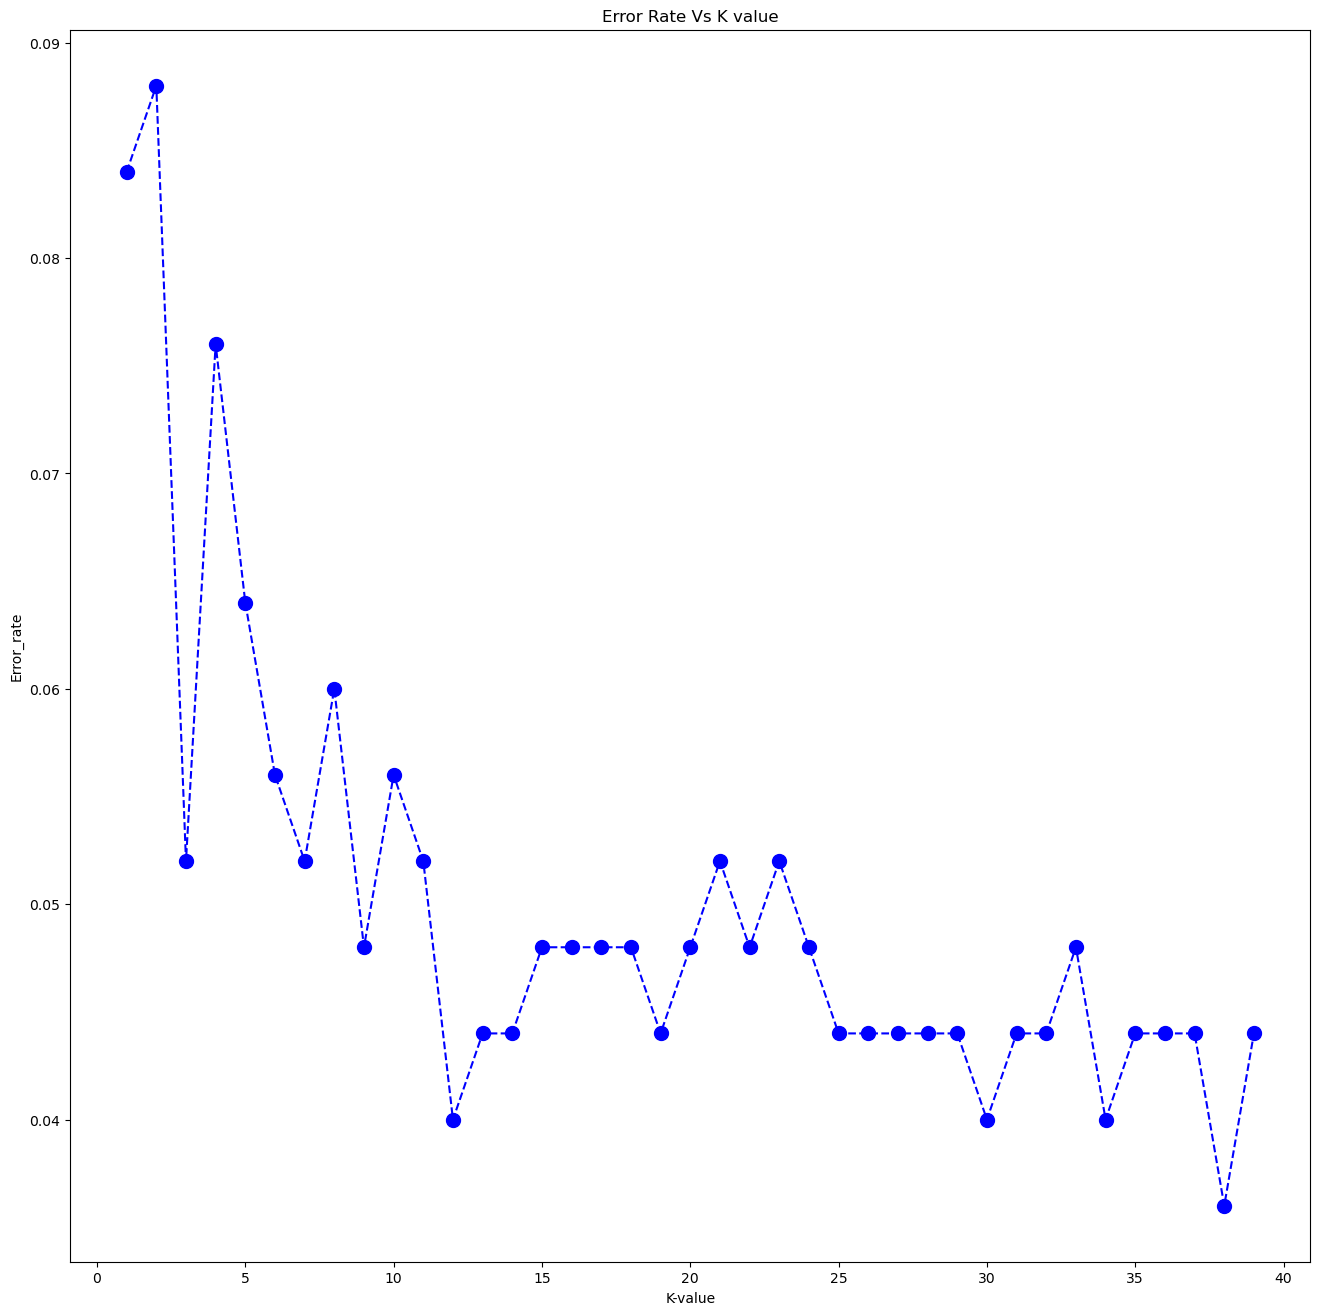

In [39]:
plt.figure(figsize=(16,16))
plt.plot(range(1,40),error_rate, color= 'blue', marker= 'o',linestyle = 'dashed',markersize=10)
plt.title('Error Rate Vs K value')
plt.xlabel('K-value')
plt.ylabel('Error_rate')
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_model1 = KNeighborsClassifier(n_neighbors=39)
knn_model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=39)

In [41]:
y_predict_train1 = knn_model.predict(x_train)
y_predict1 = knn_model.predict(x_test)

In [42]:
print('Train Accuracy')
print(accuracy_score(y_train,y_predict_train1))
print('Test Accuracy')
print(accuracy_score(y_test,y_predict1))

Train Accuracy
0.9493333333333334
Test Accuracy
0.936
